## Importing necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Reading the training and test data

In [3]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [4]:
train.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149


In [5]:
test.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180


# Processing the Data

### Dividing the training and test data into data and labels as evverything is combined


In [6]:
data = train.iloc[:,1:].values
labels = train['label']

test_data = test.iloc[:,1:].values
test_labels = test['label']

### Converting Integer data of labels to categorical data b/w 0 to 1.

In [7]:
from sklearn.preprocessing import LabelBinarizer

In [8]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
test_labels = lb.fit_transform(test_labels)

In [9]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

### Turning the data into (28*28) pixels.

In [10]:
data = data.reshape(-1,28,28)

test_data = test_data.reshape(-1,28,28)

In [11]:
data.shape, test_data.shape

((27455, 28, 28), (7172, 28, 28))

### Checking image data by plotting it.

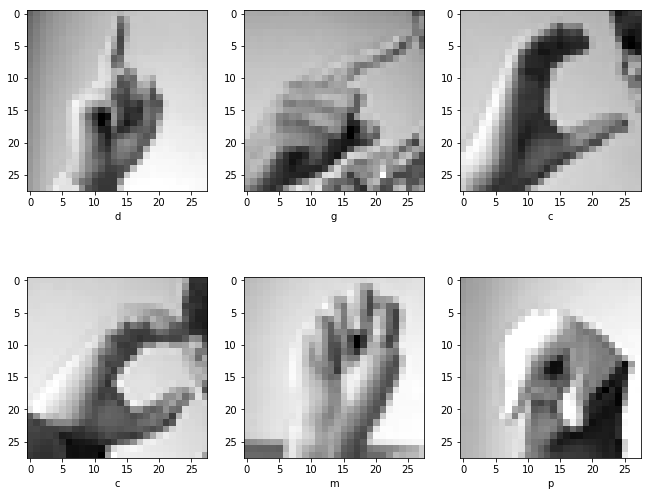

In [12]:
plt.figure(figsize=(11,9))

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(data[i],cmap='gray')
    plt.xlabel(chr(97+np.argmax(labels[i])))

### Normalizing the training and test data.

In [13]:
data = data/data.max()
test_data = test_data/test_data.max()

### Adding color channel parameter to the training and test data.

In [14]:
# B&W = 1 Channel
# RGB = 3 Channel
data = data.reshape(-1,28,28,1)
test_data = test_data.reshape(-1,28,28,1)

### Splitting the data into training, test and cross validation

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(data, labels, test_size=0.3, random_state=42)
X_test, y_test = test_data, test_labels

In [17]:
X_train.shape, X_valid.shape, X_test.shape

((19218, 28, 28, 1), (8237, 28, 28, 1), (7172, 28, 28, 1))

In [18]:
y_train.shape, y_valid.shape, y_test.shape

((19218, 24), (8237, 24), (7172, 24))

# Creating CNN Model

In [19]:
# Model
from keras.models import Sequential

# Layers
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

Using TensorFlow backend.
C:\Users\Akhil\anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Akhil\anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Akhil\anaconda3\envs\python-cvcourse\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Akhil\an

In [52]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(24, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Model Summary

In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 128)       36992     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               409728    
_________________________________________________________________
dense_4 (Dense)              (None, 24)                3096      
Total para

### Training the CNN Model with the Training data and validating it. 

In [54]:
history = model.fit(X_train,y_train,
                   validation_data=(X_valid,y_valid),
                   epochs=5)

Train on 19218 samples, validate on 8237 samples
Epoch 1/5
19218/19218 [==============================] - 53s 3ms/step - loss: 0.9284 - acc: 0.7222 - val_loss: 0.1644 - val_acc: 0.9535
Epoch 2/5
19218/19218 [==============================] - 55s 3ms/step - loss: 0.0773 - acc: 0.9783 - val_loss: 0.0066 - val_acc: 0.9996
Epoch 3/5
19218/19218 [==============================] - 60s 3ms/step - loss: 0.0180 - acc: 0.9963 - val_loss: 0.0027 - val_acc: 0.9996
Epoch 4/5
19218/19218 [==============================] - 49s 3ms/step - loss: 0.0078 - acc: 0.9978 - val_loss: 0.0086 - val_acc: 0.9977
Epoch 5/5
19218/19218 [==============================] - 54s 3ms/step - loss: 0.0036 - acc: 0.9990 - val_loss: 2.7246e-04 - val_acc: 1.0000


### Plotting to understand model's behaviour over the epochs.

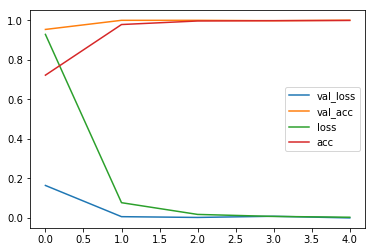

In [55]:
pd.DataFrame(history.history).plot()

### Predicting values for the test data.

In [56]:
predictions = model.predict_classes(X_test)

In [57]:
predictions

array([6, 5, 9, ..., 2, 4, 2], dtype=int64)

In [58]:
y_te = np.argmax(y_test,axis=1)
y_te

array([6, 5, 9, ..., 2, 4, 2], dtype=int64)

### Comparing the predicted values with the actual test values

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_te, predictions))

             precision    recall  f1-score   support

          0       0.86      1.00      0.93       331
          1       1.00      0.99      1.00       432
          2       1.00      0.93      0.96       310
          3       0.90      0.92      0.91       245
          4       0.91      0.99      0.95       498
          5       0.92      1.00      0.96       247
          6       0.89      0.88      0.89       348
          7       1.00      0.90      0.95       436
          8       0.87      0.93      0.90       288
          9       0.98      0.94      0.96       331
         10       1.00      1.00      1.00       209
         11       0.89      0.94      0.92       394
         12       0.99      0.64      0.78       291
         13       1.00      0.91      0.95       246
         14       0.89      1.00      0.94       347
         15       0.99      0.87      0.93       164
         16       0.61      0.49      0.54       144
         17       0.89      0.91      0.90   